In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

header = ["unit num", "cycle", "op1", "op2", "op3"]
for i in range(0, 26):
    name = "sens"
    name = name + str(i+1)
    header.append(name)

df_RUL_001 = pd.read_csv('Dataset\RUL_FD001.txt', delimiter = " ")
df_train_001 = pd.read_csv('Dataset\\train_FD001.txt', delimiter = " ", names=header)

In [2]:
df_RUL_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   112         99 non-null     int64  
 1   Unnamed: 1  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


,112,Unnamed: 1
0,98,NaN
1,69,NaN
2,82,NaN
3,91,NaN
4,93,NaN
5,91,NaN
6,95,NaN
7,111,NaN
8,96,NaN
9,97,NaN


In [3]:
df_train_001.head(10)

,unit num,cycle,op1,op2,op3,sens1,sens2,sens3,sens4,sens5,...,sens17,sens18,sens19,sens20,sens21,sens22,sens23,sens24,sens25,sens26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,391,2388,100.0,38.98,23.3669,NaN,NaN,NaN,NaN,NaN
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,392,2388,100.0,39.10,23.3774,NaN,NaN,NaN,NaN,NaN
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,391,2388,100.0,38.97,23.3106,NaN,NaN,NaN,NaN,NaN
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,392,2388,100.0,39.05,23.4066,NaN,NaN,NaN,NaN,NaN
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,393,2388,100.0,38.95,23.4694,NaN,NaN,NaN,NaN,NaN


In [4]:
df_train_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   unit num  20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sens1     20631 non-null  float64
 6   sens2     20631 non-null  float64
 7   sens3     20631 non-null  float64
 8   sens4     20631 non-null  float64
 9   sens5     20631 non-null  float64
 10  sens6     20631 non-null  float64
 11  sens7     20631 non-null  float64
 12  sens8     20631 non-null  float64
 13  sens9     20631 non-null  float64
 14  sens10    20631 non-null  float64
 15  sens11    20631 non-null  float64
 16  sens12    20631 non-null  float64
 17  sens13    20631 non-null  float64
 18  sens14    20631 non-null  float64
 19  sens15    20631 non-null  float64
 20  sens16    20631 non-null  fl

# Graphs to illustrate data

In [5]:
# to show avg cycle at which event occurred
avg_cycle = []
for i in range(1, 101):
    df_engine = df_train_001[df_train_001['unit num'] == i]
    max_cycle = df_engine.loc[df_engine['cycle'].idxmax()]
    avg_cycle.append(max_cycle["cycle"].astype(int))

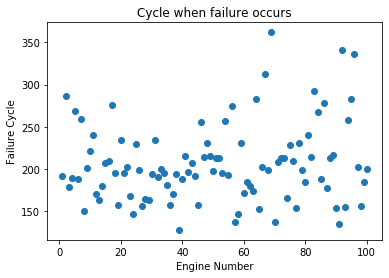

In [6]:
plt.scatter(range(1, 101), avg_cycle, marker='o')
plt.xlabel("Engine Number")
plt.ylabel("Failure Cycle")
plt.title("Cycle when failure occurs")
plt.show()

In [7]:
print(stats.describe(avg_cycle))

DescribeResult(nobs=100, minmax=(128, 362), mean=206.31, variance=2147.6504040404043, skewness=1.0159342583415127, kurtosis=1.113867529578351)


# Print variation of signals from selected sensor

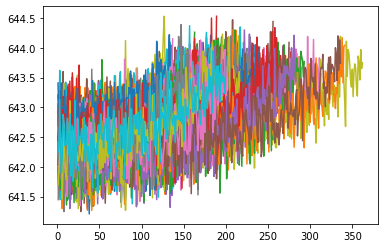

In [78]:
sensor = 'sens2'
for i in range(1, 101):
    df_engine = df_train_001[df_train_001['unit num'] == i]
    plt.plot(df_engine['cycle'], df_engine[sensor])
plt.show()

# Preprocessing step 1: select useful sensor signals

In [9]:
# extract mean trend
no_columns = 21
up_sensor_values = np.empty([max(avg_cycle), no_columns]) # 26 sensors with a max cycle of 362
lo_sensor_values = np.empty([max(avg_cycle), no_columns]) # 26 sensors with a max cycle of 362
for col in range(0, no_columns):
    sensor = 'sens'
    sensor = sensor + str(col+1)
    for row in range(0, max(avg_cycle)):
        df_train_sens = df_train_001[['cycle', sensor]]
        df_train_sens = df_train_001[df_train_001['cycle'] == row+1]
        max_value = df_train_sens.loc[df_train_sens[sensor].idxmax()]
        min_value = df_train_sens.loc[df_train_sens[sensor].idxmin()]
        up_sensor_values[row, col] = max_value[sensor]
        lo_sensor_values[row, col] = min_value[sensor]

In [19]:
mean_trend = (up_sensor_values + lo_sensor_values)/2
print(mean_trend)

[[ 518.67    642.43   1585.2    ...  100.       38.94     23.3683]
 [ 518.67    642.24   1588.325  ...  100.       38.98     23.3861]
 [ 518.67    642.585  1588.805  ...  100.       38.895    23.3494]
 ...
 [ 518.67    643.97   1597.75   ...  100.       38.47     23.0422]
 [ 518.67    643.65   1603.5    ...  100.       38.52     23.1208]
 [ 518.67    643.75   1598.16   ...  100.       38.42     22.9782]]


In [75]:
# not used as it doesnt work!
def monotonicity(sensor_number, mean_trend):
    sensor_number -= 1
    num_rows, num_cols = mean_trend.shape
    LHS = []
    RHS = []
    for t in range(0, num_rows):
        if(t == num_rows-1):
            break
        LHS.append(np.sign(mean_trend[t+1, sensor_number] - mean_trend[t, sensor_number]))
        RHS.append(np.sign(mean_trend[t, sensor_number] - mean_trend[t+1, sensor_number]))
    #print([a_i + b_i for a_i, b_i in zip(LHS, RHS)])
    return abs(sum(LHS) - sum(RHS))/(num_rows-1)

In [76]:
# Use MannKendall Trend Analysis
import pymannkendall as mk
mono = []
def MannKendall(sensor_number, mean_trend):
    sensor_number -= 1
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test([row[sensor_number] for row in mean_trend])
    return Tau

<function matplotlib.pyplot.show(*args, **kw)>

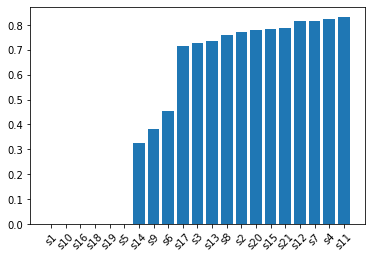

In [77]:
mono = []

sensor_header = []
for i in range(0, 21):
    name = "s"
    name = name + str(i+1)
    sensor_header.append(name)

for i in range(1, no_columns+1):
    mono.append(abs(MannKendall(i, mean_trend)))

y,x = zip(*sorted(zip(mono,sensor_header)))
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show
# Based on MannKendall, sensor 2, 3, 4, 7, 8, 11, 12, 13, 15, 17, 20 and 21 are selected
